## Personal Project 1
---
## Financial data analysis
---
## Introduction
In this project, we will load and analyze the finance data.


In [48]:
#Load data
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Manohar Projects/Financial_Data/Financials.csv")

In [49]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [50]:
df_dummy=df

In [51]:
df_dummy.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [52]:
#Changing the column names
df_dummy.rename(columns={
    'Segment': 'segment',
    'Country': 'country',
    ' Product ': 'product',
    ' Discount Band ': 'discount_band',
    ' Units Sold ': 'units_sold($)',
    ' Manufacturing Price ': 'manufacturing_price($)',
    ' Sale Price ': 'sale_price($)',
    ' Gross Sales ': 'gross_sales($)',
    ' Discounts ': 'discounts($)',
    '  Sales ': 'sales($)',
    ' COGS ': 'cogs($)',
    ' Profit ': 'profit($)',
    'Date': 'date',
    'Month Number': 'month_number',
    ' Month Name ': 'month_name',
    'Year': 'year'
}, inplace=True)

In [53]:
df_dummy.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold($)',
       'manufacturing_price($)', 'sale_price($)', 'gross_sales($)',
       'discounts($)', 'sales($)', 'cogs($)', 'profit($)', 'date',
       'month_number', 'month_name', 'year'],
      dtype='object')

In [54]:
# Finding the null values
df_dummy.isna().sum()

,0
segment,0
country,0
product,0
discount_band,0
units_sold($),0
manufacturing_price($),0
sale_price($),0
gross_sales($),0
discounts($),0
sales($),0


In [55]:
#shape of the dataset
df_dummy.shape

(700, 16)

In [56]:
# Unique products with thier count
df_dummy['product'].value_counts()

,count
product,
Paseo,202
Velo,109
VTT,109
Amarilla,94
Carretera,93
Montana,93


## Removing the special characters in the data and replacing them with ''.

In [57]:
df_dummy['manufacturing_price($)']=df['manufacturing_price($)'].str.replace('$','')
df_dummy['sale_price($)']=df_dummy['sale_price($)'].str.replace('$','')
df_dummy['gross_sales($)']=df_dummy['gross_sales($)'].str.replace('$','')
df_dummy[ 'discounts($)']=df_dummy[ 'discounts($)'].str.replace('$','')
df_dummy[ 'discounts($)']=df_dummy[ 'discounts($)'].str.replace('-','0')
df_dummy['sales($)' ]=df_dummy[ 'sales($)'].str.replace('$','')
df_dummy['cogs($)' ]=df_dummy[ 'cogs($)'].str.replace('$','')
df_dummy['profit($)' ]=df_dummy[ 'profit($)'].str.replace('$','')
df_dummy['units_sold($)' ]=df_dummy[ 'units_sold($)'].str.replace('$','')

df_dummy.head()



,segment,country,product,discount_band,units_sold($),manufacturing_price($),sale_price($),gross_sales($),discounts($),sales($),cogs($),profit($),date,month_number,month_name,year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",0,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",0,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",0,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",0,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",0,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [58]:
# Data type of each attribute
df_dummy.dtypes

,0
segment,object
country,object
product,object
discount_band,object
units_sold($),object
manufacturing_price($),object
sale_price($),object
gross_sales($),object
discounts($),object
sales($),object


## After removing the '$' and '-' there are still some characters to be cleaned. Replacing empty string with nan values

In [59]:
import numpy as np
import pandas as pd



# Clean the columns by removing commas, parentheses, and handling empty/dash values
df_dummy.iloc[:, 4:12] = df_dummy.iloc[:, 4:12].apply(
    lambda x: x .str.replace(',', '')           # Remove commas
             .str.replace('(', '-')           # Convert opening parentheses to negative sign
             .str.replace(')', '')            # Remove closing parentheses
             .str.strip()                     # Strip extra spaces
             .replace('-', np.nan)            # Replace dashes with NaN
             .replace('', np.nan)             # Replace empty strings with NaN
)

df_dummy['profit($)'] = df_dummy['profit($)'].astype(float)
df_dummy['profit($)'] = df_dummy['profit($)'].fillna(df_dummy['profit($)'].mean())



In [60]:
# Again checking the null values
df_dummy.isna().sum()

,0
segment,0
country,0
product,0
discount_band,0
units_sold($),0
manufacturing_price($),0
sale_price($),0
gross_sales($),0
discounts($),0
sales($),0


## Coverting the object dtypes to integer type

In [80]:

 #df_dummy['profit($)']=df_dummy['profit($)'].astype(float)
df_dummy['manufacturing_price($)'] = df_dummy['manufacturing_price($)'].astype(float)
df_dummy['sale_price($)'] = df_dummy['sale_price($)'].astype(float)
df_dummy['gross_sales($)'] = df_dummy['gross_sales($)'].astype(float)
df_dummy['discounts($)'] = df_dummy['discounts($)'].astype(float)
df_dummy['sales($)'] = df_dummy['sales($)'].astype(float)
df_dummy['cogs($)'] = df_dummy['cogs($)'].astype(float)
df_dummy['profit($)'] = df_dummy['profit($)'].astype(float)
df_dummy['units_sold($)'] = df_dummy['units_sold($)'].astype(float)
df_dummy['date']=pd.to_datetime(df_dummy['date'], errors='coerce')


In [81]:
df_dummy.dtypes

,0
segment,object
country,object
product,object
discount_band,object
units_sold($),float64
manufacturing_price($),float64
sale_price($),float64
gross_sales($),float64
discounts($),float64
sales($),float64


In [82]:
# Descriptive statistics
df_dummy.describe()

,units_sold($),manufacturing_price($),sale_price($),gross_sales($),discounts($),sales($),cogs($),profit($),date,month_number,year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354671,1.696091e+05,145475.211429,24307.485309,2013-10-08 15:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-01-09 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2948.097500,2013-10-04 12:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9372.600000,2014-01-05 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.347500,2.610775e+05,245607.500000,23250.900000,2014-01-09 06:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-01-12 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928760,2.367263e+05,203865.506118,42711.531804,NaN,3.377321,0.433322


In [65]:
# Lets find out the Numeric colummns and non-numerical columns
num_col=df_dummy.select_dtypes(include=['int64','float64']).columns
non_num_col=df_dummy.select_dtypes(include=['object']).columns

#lets create a data frame for this
classifying_col=pd.DataFrame({'numeric_null':pd.Series(num_col),
                              'non-num_null':pd.Series(non_num_col)})
#Include the columns that contain only null values
classifying_col


,numeric_null,non-num_null
0,units_sold($),segment
1,manufacturing_price($),country
2,sale_price($),product
3,gross_sales($),discount_band
4,discounts($),month_name
5,sales($),NaN
6,cogs($),NaN
7,profit($),NaN
8,month_number,NaN
9,year,NaN


In [66]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Taking the numerical columns
df_col = df_dummy[['sales($)', 'cogs($)', 'profit($)', 'units_sold($)', 'manufacturing_price($)', 'sale_price($)', 'gross_sales($)']]
df_col

,sales($),cogs($),profit($),units_sold($),manufacturing_price($),sale_price($),gross_sales($)
0,32370.00,16185.0,16185.00,1618.5,3.0,20.0,32370.0
1,26420.00,13210.0,13210.00,1321.0,3.0,20.0,26420.0
2,32670.00,21780.0,10890.00,2178.0,3.0,15.0,32670.0
3,13320.00,8880.0,4440.00,888.0,3.0,15.0,13320.0
4,37050.00,24700.0,12350.00,2470.0,3.0,15.0,37050.0
...,...,...,...,...,...,...,...
695,631125.00,618750.0,12375.00,2475.0,260.0,300.0,742500.0
696,139230.00,136500.0,2730.00,546.0,260.0,300.0,163800.0
697,8139.60,6840.0,1299.60,1368.0,5.0,7.0,9576.0
698,4301.85,3615.0,686.85,723.0,10.0,7.0,5061.0


## How do the numerical attributes change over time (by month)?

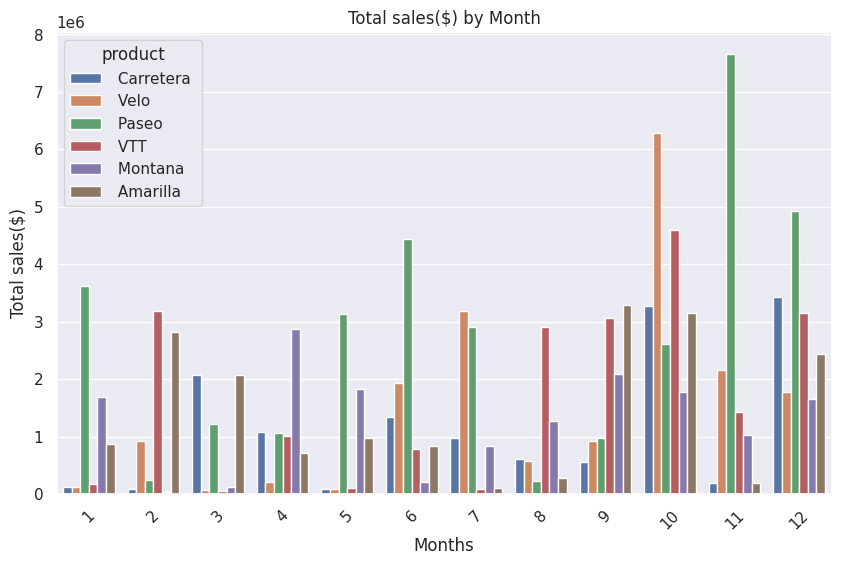

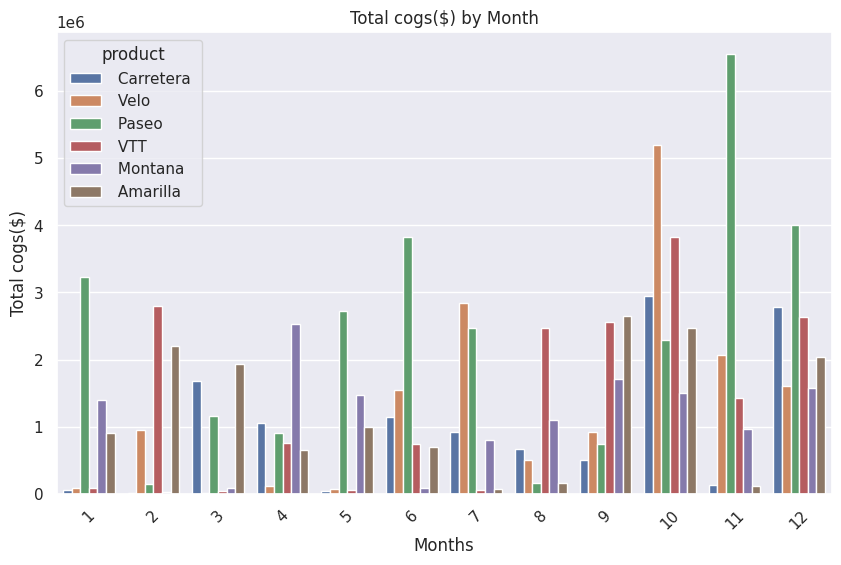

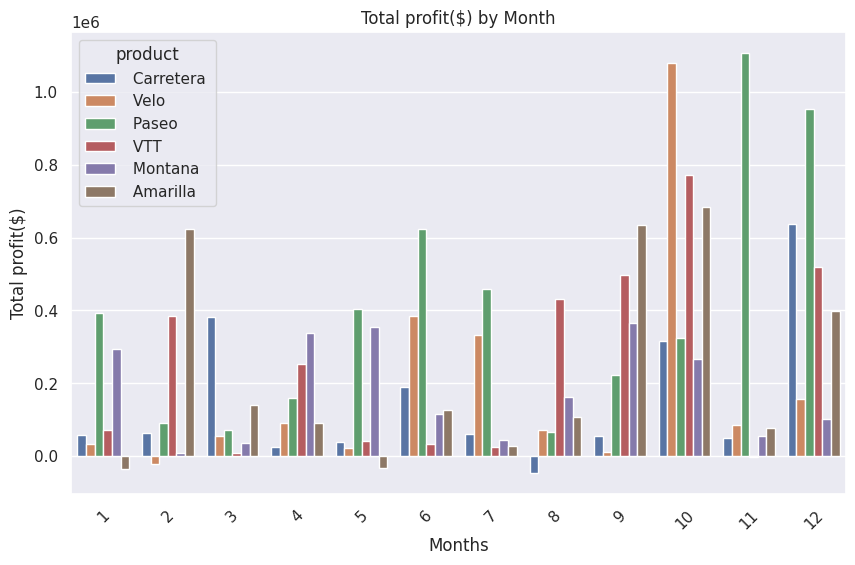

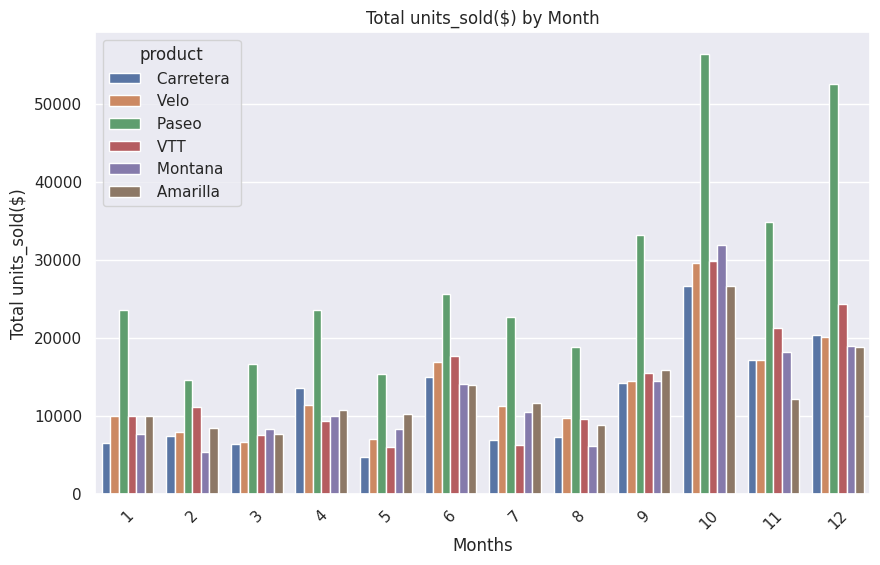

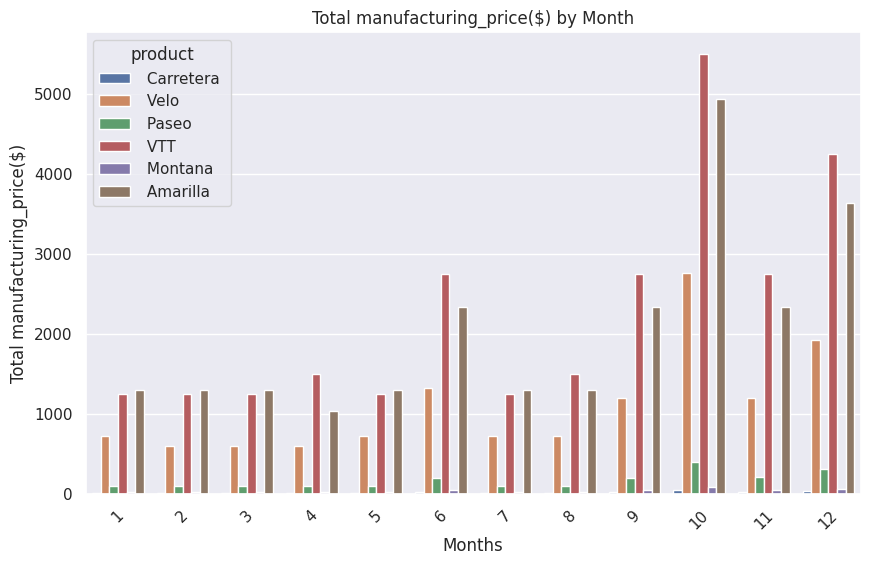

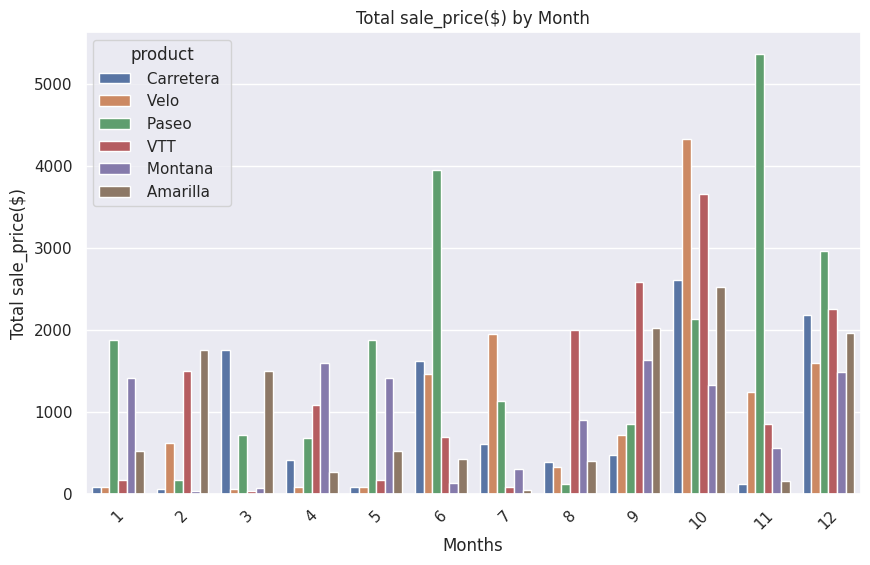

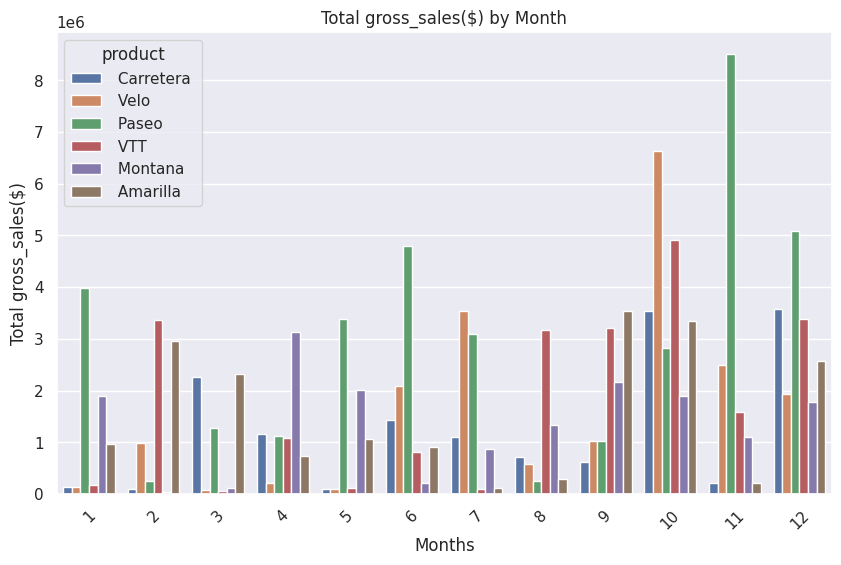

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

#ploting the columns at a time
for col in df_col:

  #barplot
  plt.figure(figsize=(10,6))  # Optional: to adjust the figure size
  sns.barplot(x=df['month_number'], y=col, data=df_dummy, estimator='sum', ci=None,hue=df_dummy['product'])

  # Adding labels and title
  plt.xlabel('Months')
  plt.ylabel(f'Total {col}')
  plt.title(f'Total {col} by Month')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45)

  # Show plot
  plt.show()

## How do the gross sales done across different nations?

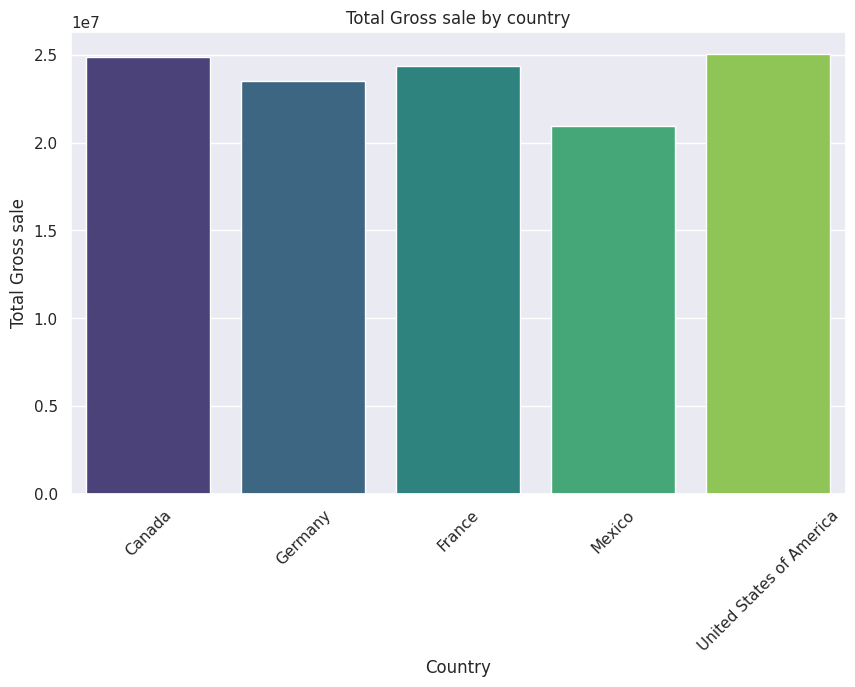

In [69]:
plt.figure(figsize=(10,6))  # Optional: to adjust the figure size
sns.barplot(x=df['country'], y='sales($)', data=df_dummy, estimator='sum', ci=None, palette='viridis')

  # Adding labels and title
plt.xlabel('Country')
plt.ylabel(f'Total Gross sale')
plt.title(f'Total Gross sale by country')

  # Rotate x-axis labels for better readability
plt.xticks(rotation=45)

  # Show plot
plt.show()

## Discounts and Its Effect on Sales
#Question: Is there any correlation between discounts and sales?

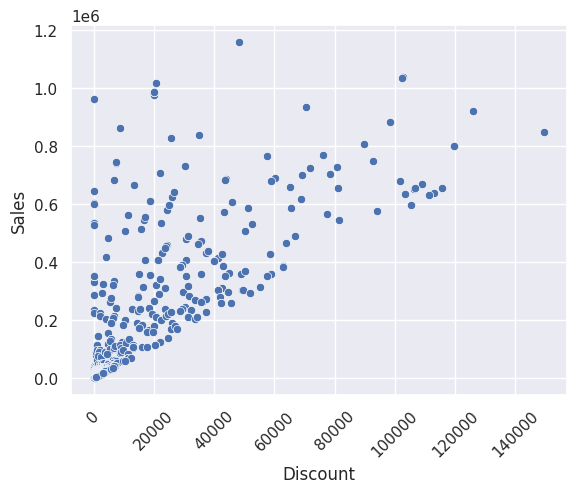

In [91]:
#Discounts and Its Effect on Sales
#Question: Is there any correlation between discounts and sales?
sns.scatterplot(data=df_dummy, x='discounts($)',y='sales($)')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#Discount Distribution
#Question: What is the distribution of discounts (discounts($)) across different segments or countries?

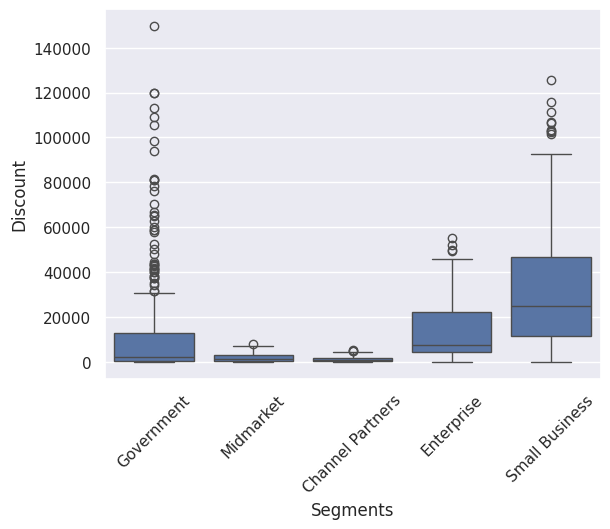

In [88]:
#Discount Distribution
#Question: What is the distribution of discounts (discounts($)) across different segments or countries?
sns.boxplot(data=df_dummy,x='segment',y='discounts($)')
plt.xlabel('Segments')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

#Gross Sales vs. Manufacturing Price
#Question: How do manufacturing prices correlate with gross sales?

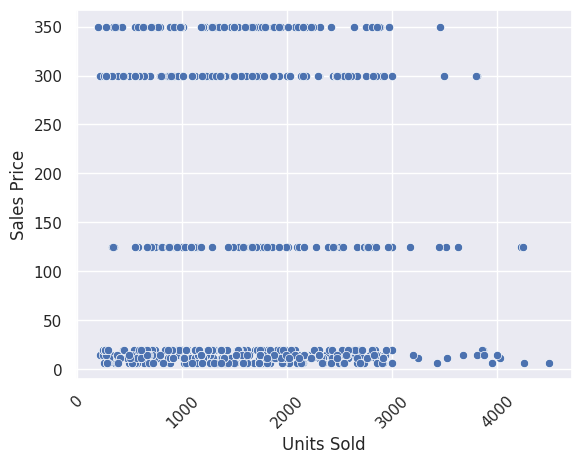

In [89]:
#Gross Sales vs. Manufacturing Price
#Question: How do manufacturing prices correlate with gross sales?
sns.scatterplot(data=df_dummy, x='units_sold($)',y='sale_price($)')
plt.xlabel('Units Sold')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.show()

#Top Performing Segments by Profit
#Question: Which segment is generating the highest profit?

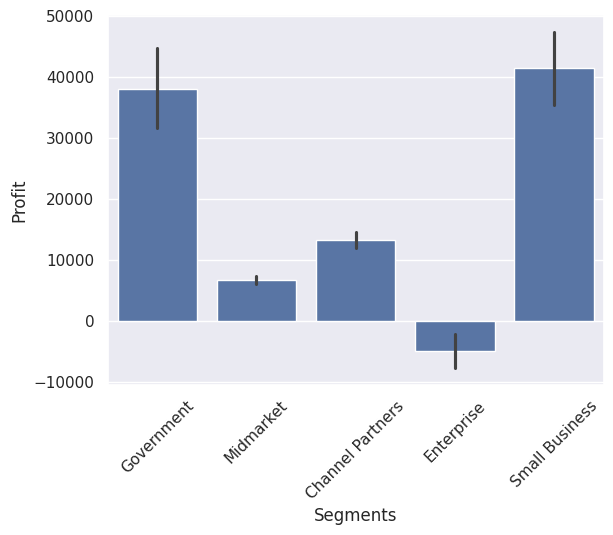

In [90]:
#Top Performing Segments by Profit
#Question: Which segment is generating the highest profit?
sns.barplot(data=df_dummy,x='segment',y='profit($)')
plt.xlabel('Segments')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

# How the season effect the sales?

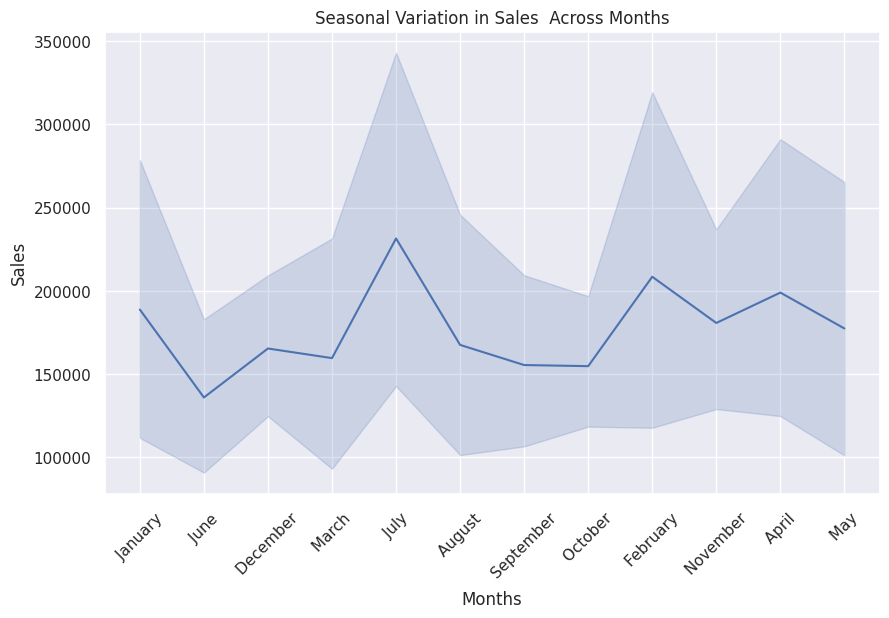

In [85]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_dummy, x='month_name', y='sales($)')

# Add title and labels
plt.title('Seasonal Variation in Sales  Across Months')
plt.xlabel('Months')
plt.ylabel('Sales')

# Show the plot
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.show()

##Identify the Top 5 Numerical Variables
Calculate Correlation: Find the correlation between Sales and all other numerical features.

Select Top 5: Sort these correlations in descending order and pick the top 5 features.

In [77]:
#select the numerical columns
num_col=df_dummy.select_dtypes(include=['int64','float64']).columns

#calculate the correlation with sales and sort by absolute value
correlation_with_sales=df_dummy[num_col].corr()['sales($)'].abs().sort_values(ascending=False)
top_5_features=correlation_with_sales.index[1:6]
correlation_with_sales[top_5_features]

,sales($)
gross_sales($),0.998174
cogs($),0.992244
profit($),0.806415
sale_price($),0.805878
discounts($),0.743447


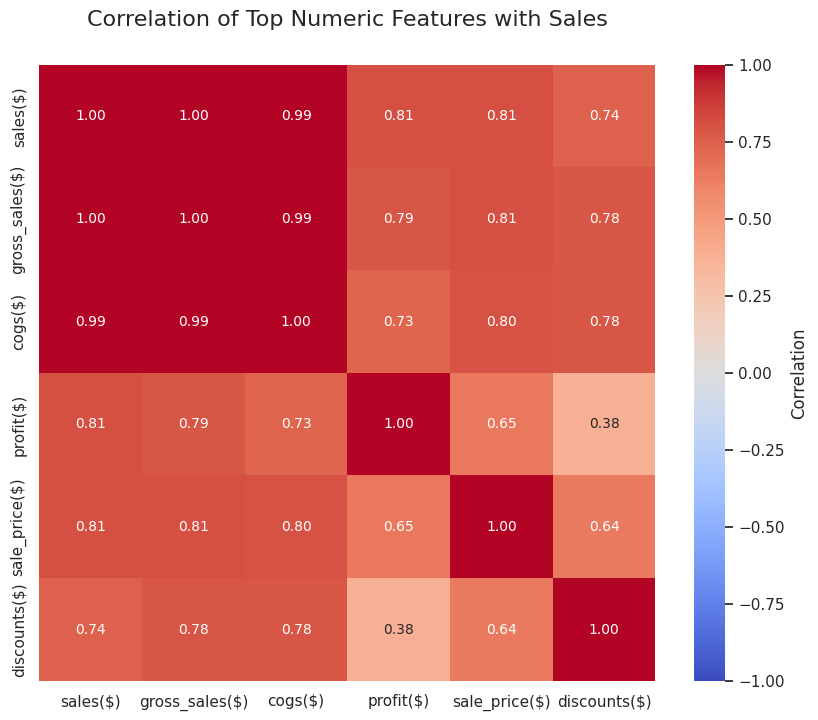

In [78]:
# Calculate correlation matrix for numerical features
correlation = df_dummy.select_dtypes(include=['int64', 'float64']).corr()

# Sort the features by their correlation with SalePrice
top_features = correlation['sales($)'].sort_values(ascending=False).index[:6]  # Top 5 + SalePrice itself
correlation_top_features = correlation.loc[top_features, top_features]

# Create the plot
f, ax = plt.subplots(figsize=(10, 8))
plt.title('Correlation of Top Numeric Features with Sales', y=1.05, size=16)

# Plot heatmap with annotations
sns.heatmap(correlation_top_features, annot=True, square=True, cmap='coolwarm', vmax=1, vmin=-1, fmt='.2f',
            annot_kws={"size": 10}, cbar_kws={'label': 'Correlation'})

plt.show()


# PairPlot

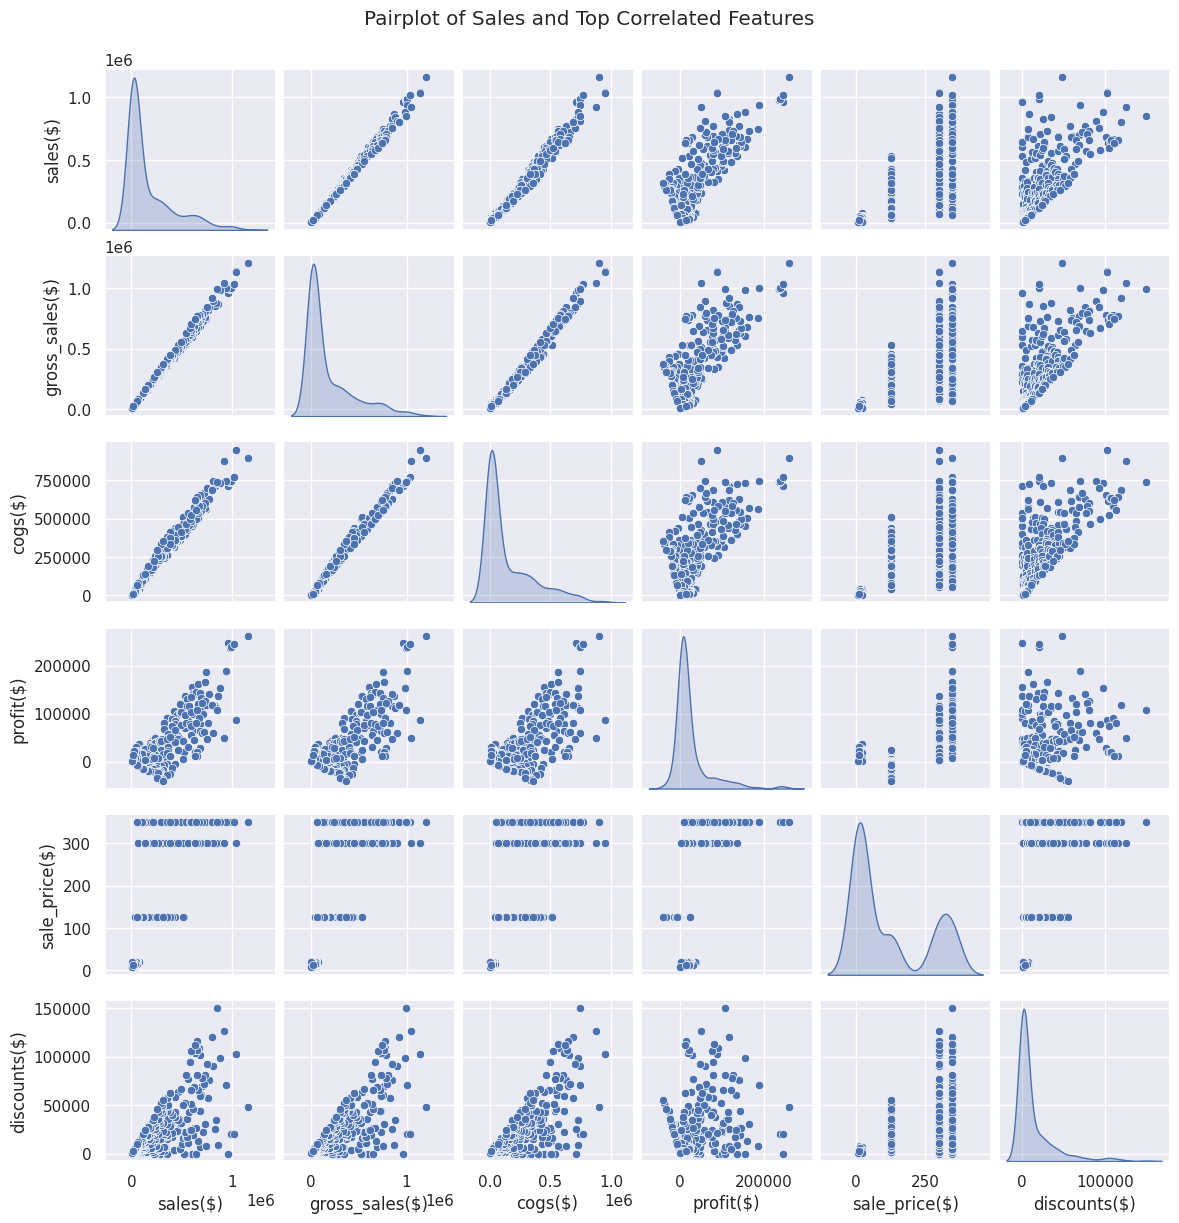

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the Seaborn style
sns.set()


# Pairplot with scatter plots and KDE on diagonals
sns.pairplot(df[top_features], height=2, kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of Sales and Top Correlated Features", y=1.02)  # Title for clarity
plt.show()
